In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-agriculture-crop-production/India Agriculture Crop Production.csv


# 🌾 Crop Production Prediction using Machine Learning

## 📌 Project Overview
Agriculture is a key sector in when it comes to our country, and predicting crop production can help optimize **resource allocation, yield forecasting, and policy-making**. In this project, I used historical crop production data to build **predictive models** that estimate crop yield and production based on features like **State, District, Crop, Season, Area, and Year**.

### 🎯 Objective
To develop and compare multiple machine learning models for predicting crop production and identify the most accurate model.

---

## 📊 Dataset Description
- **Source:** Kaggle – Agriculture Crops Production in India  
- **Rows:** ~345,407  
- **Columns:** 10 (including categorical and numerical features)  
- **Target Variable:** `Yield`  

### Key Features:
- **State:** Name of the state
- **District:** Name of the district
- **Season:** Season of cultivation
- **Crop:** Type of crop grown
- **Year:** Year of cultivation
- **Area:** Cultivation area (in hectares)
- **Production:** Total crop production
- **Yield:** (Target Variable)

---


## **1. Dataset Overview**

### **1.1 Read Dataset**

In [43]:
df = pd.read_csv('/kaggle/input/india-agriculture-crop-production/India Agriculture Crop Production.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


### **1.2 First 5 rows**  

In [44]:
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


### **1.3 Shape & Structure**

In [45]:
df.shape

(345407, 10)

we have 345k records, that makes it a medium to large dataset and 10 columns 

## **2. Exploratory Data Analysis (EDA)**

### **2.1 Null Values**

In [46]:
df.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

### **2.2 Unique values in 'Area Units' columns**

In [47]:
df['Area Units'].unique()

array(['Hectare'], dtype=object)

### **2.3 Unique values in 'Production Units' columns**

In [48]:
df['Production Units'].unique()

array(['Tonnes', 'Nuts', 'Bales'], dtype=object)

### **2.4 List of Numeric columns**

In [49]:
num_cols = (df.dtypes != 'object')
num_cols = list(num_cols[num_cols].index)
print('the numeric cols are : ' , num_cols)

the numeric cols are :  ['Area', 'Production', 'Yield']


### **2.5 List of Categorical columns**

In [50]:
obj_cols = (df.dtypes == 'object')
obj_cols = list(obj_cols[obj_cols].index)
print('the categorical columns are : ' , obj_cols)

the categorical columns are :  ['State', 'District', 'Crop', 'Year', 'Season', 'Area Units', 'Production Units']


In [51]:
target = df['Yield']
target.head()

0    1.643541
1    1.655803
2    1.209358
3    1.690000
4    1.696296
Name: Yield, dtype: float64

### **2.6 Sum of Null values in Numeric columns**

In [52]:
df[num_cols].isnull().sum()

Area            33
Production    4993
Yield           33
dtype: int64

### **2.7 Sum Null values in Categorical columns**

In [53]:
df[obj_cols].isnull().sum()

State                0
District             0
Crop                32
Year                 0
Season               1
Area Units           0
Production Units     0
dtype: int64

### **2.8 Extract names of null columns**

In [54]:
null_num = df[num_cols].columns[df[num_cols].isnull().any()]
print('numeric columns with null values are : ',null_num)

numeric columns with null values are :  Index(['Area', 'Production', 'Yield'], dtype='object')


In [55]:
null_obj = df[obj_cols].columns[df[obj_cols].isnull().any()]
print('categorical columns with null values are : ',null_obj)

categorical columns with null values are :  Index(['Crop', 'Season'], dtype='object')


### **2.9 Percentage of missing values in Numeric and Categorical columns**

In [56]:
#percentage missing of numeric cols 
percent_num = (df[null_num].isnull().sum() / len(df)) * 100
percent_num

Area          0.009554
Production    1.445541
Yield         0.009554
dtype: float64

as the percentage of missing value is low, we can fill in the missing values without having any concerns regarding the effect on the accuracy of our model

In [57]:
percent_obj = (df[null_obj].isnull().sum() / len(df)) * 100
percent_obj

Crop      0.009264
Season    0.000290
dtype: float64

as the percentage of missing value is low, we can fill in the missing values without having any concerns regarding the effect on the accuracy of our model

### **2.10 Correlation of Numeric variables with target variable**

In [58]:
df_num = df[num_cols]
df_num.head()

,Area,Production,Yield
0,1254.0,2061.0,1.643541
1,1258.0,2083.0,1.655803
2,1261.0,1525.0,1.209358
3,3100.0,5239.0,1.690000
4,3105.0,5267.0,1.696296


#### **2.10.1 Correlation Heatmap**

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

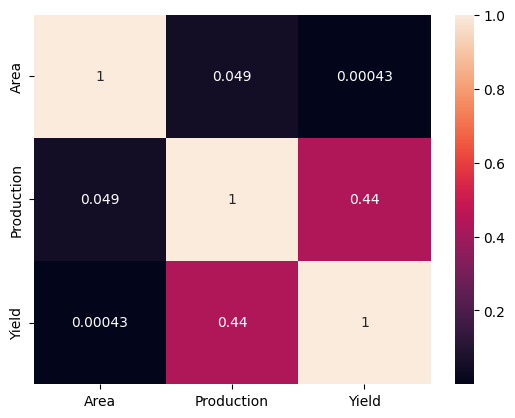

In [60]:
corr = df_num.corr()
sns.heatmap(corr , annot= True)
        

### **2.11 Anova Test for Signal Detection**

In [61]:
from scipy.stats import f_oneway

#### **2.11.1 Anova Test**

In [75]:
target = 'Yield'
cols_keep = []
for col in obj_cols:
    if df[col].nunique() > 1 and df[col].isnull().sum() == 0:
        groups = [group[target].values for _, group in df.groupby(col)]
        if len(groups) > 1:
            f_stat, p = f_oneway(*groups)
            print(f"{col}: F = {f_stat:.2f}, p = {p:.4f}")
            if p < 0.05:
              cols_keep.append(col)


State: F = 205.70, p = 0.0000
District: F = 11.90, p = 0.0000
Crop: F = 21822.72, p = 0.0000
Year: F = 2.92, p = 0.0000
Season: F = 1680.02, p = 0.0000
Production Units: F = 610682.71, p = 0.0000


#### **2.11.2 List of columns with signal**

In [76]:
print('the categorical variables with signal : ' , cols_keep)

the categorical variables with signal :  ['State', 'District', 'Crop', 'Year', 'Season', 'Production Units']


### **2.12 Key Visualisations**

#### **2.12.1 Production Distribution**

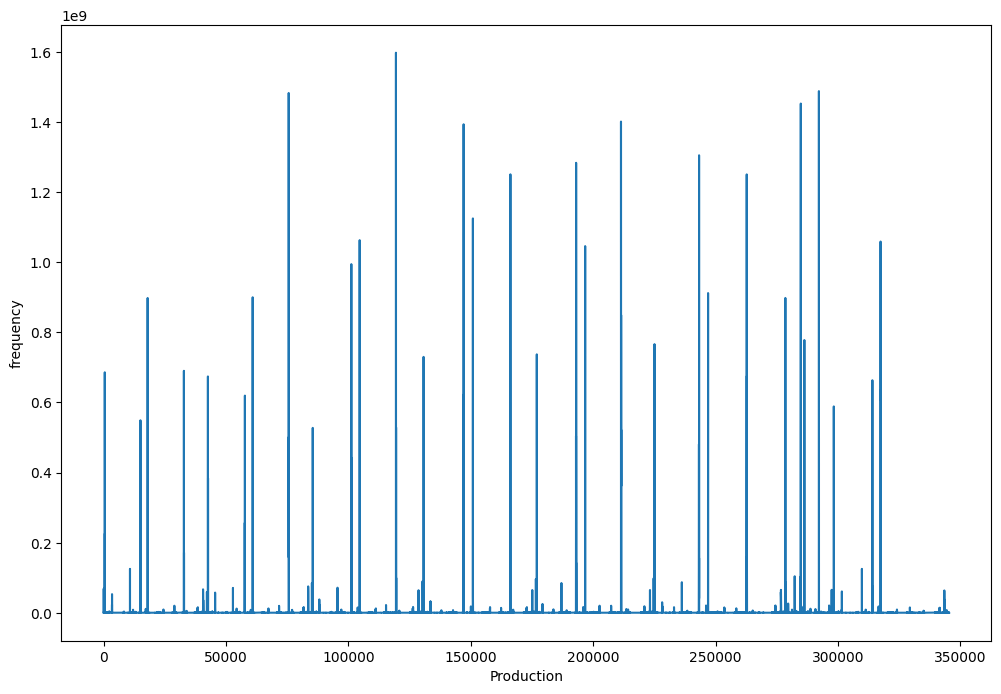

In [62]:
plt.figure(figsize=(12,8))
sns.lineplot(df['Production'])
plt.xlabel('Production')
plt.ylabel('frequency')
plt.show()

#### **2.12.2 Top 10 Crops Produced**

In [63]:
top_crop = df.groupby('Crop')['Production'].sum().sort_values(ascending = False)

In [64]:
top_crop = top_crop.head(10)

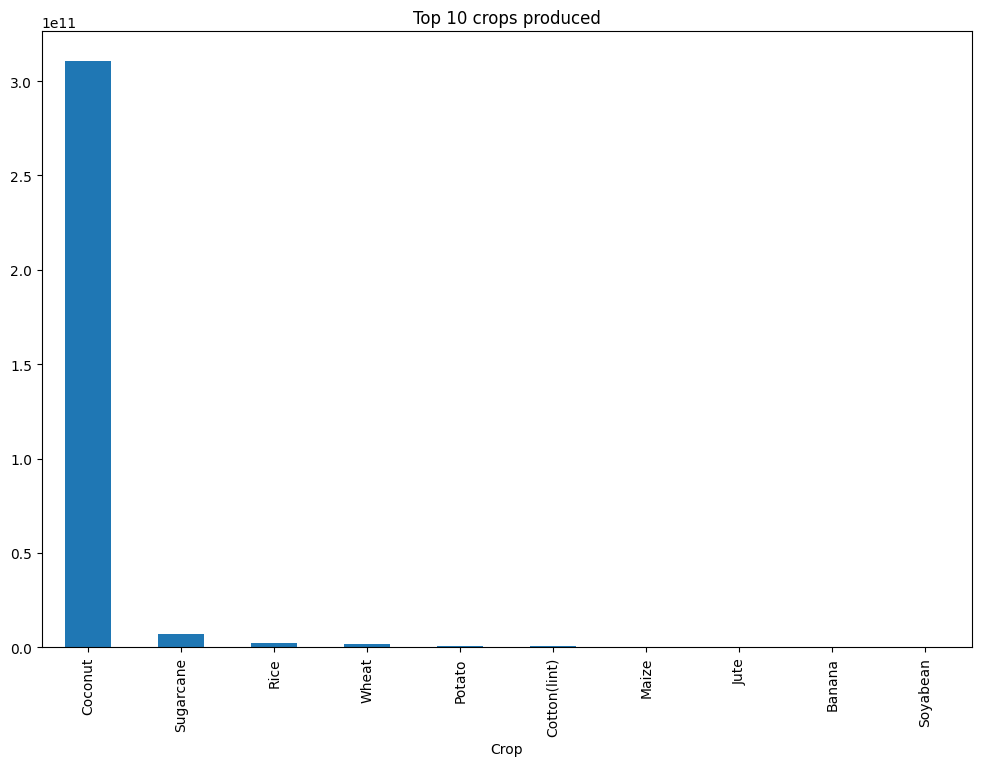

In [65]:
top_crop.plot(kind='bar' , title = 'Top 10 crops produced' , figsize = (12,8))
plt.show()

#### from the barchart we can see that 'COCONUTS' are the top produced crop 

In [66]:
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


#### **2.12.3 District based crop production**

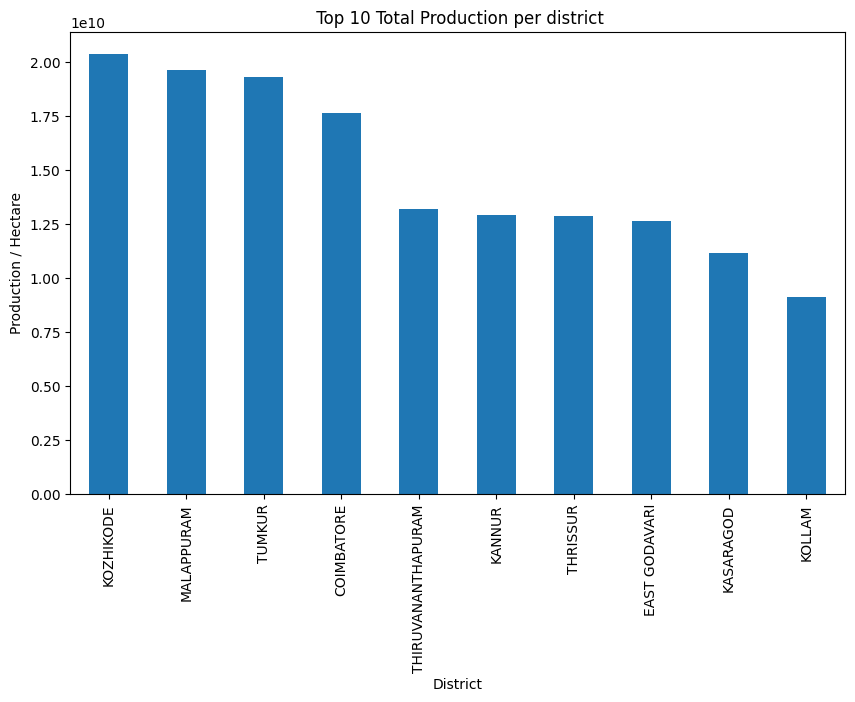

In [67]:
production_district = df.groupby('District').Production.sum().sort_values(ascending = False).head(10)
production_district.plot(kind='bar' , title=' Top 10 Total Production per district' , figsize=(10,6))
plt.xlabel('District')
plt.ylabel('Production / Hectare')
plt.show()

#### **2.12.4 Seasonal crop production**

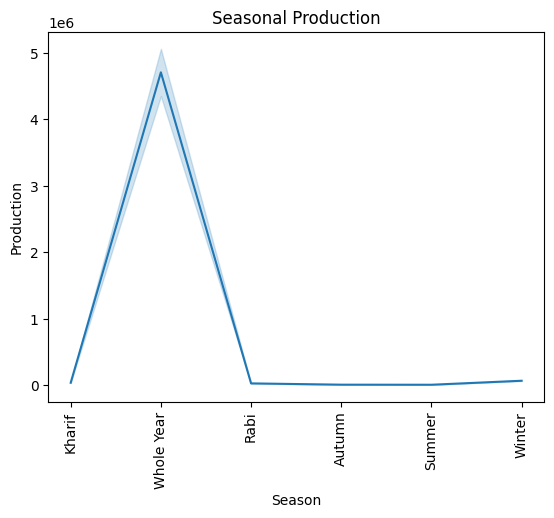

In [68]:
sns.lineplot(x= 'Season' , y='Production' , data = df)
plt.xlabel('Season')
plt.ylabel('Production')
plt.xticks(rotation = 90)
plt.title('Seasonal Production')
plt.show()

#### **2.12.5 Top 5 states based on production**

In [69]:
df2 = pd.read_csv('/kaggle/input/india-agriculture-crop-production/India Agriculture Crop Production.csv')

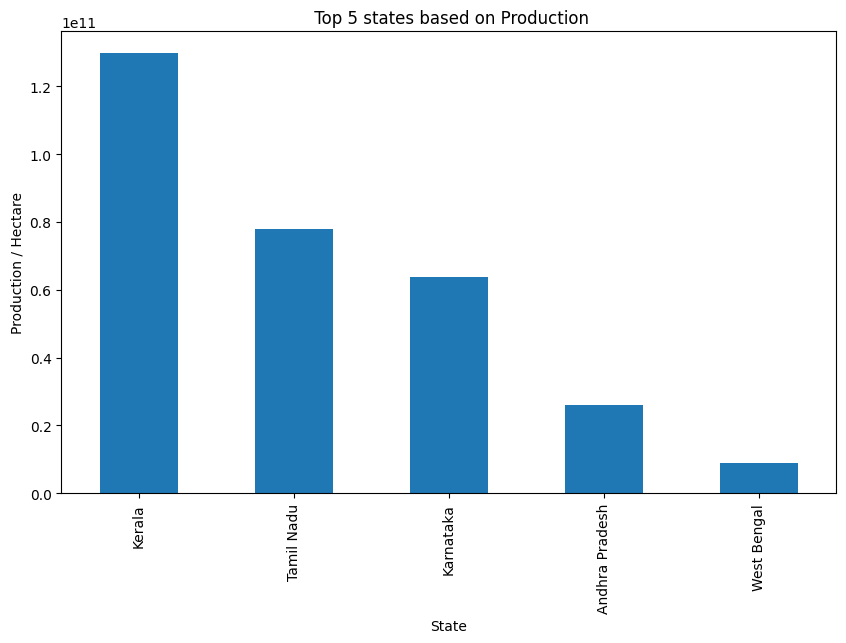

In [70]:
top5 = df2.groupby('State')['Production'].sum().sort_values(ascending = False).head(5)
top5.plot(kind='bar' , title=' Top 5 states based on Production' , figsize=(10,6))
plt.xlabel('State')
plt.ylabel('Production / Hectare')
plt.show()

## **3. Data Preprocessing**

### **3.1 Imputation**

#### **3.1.1 Numeric : SimpleImputer (mean)**

In [71]:
from sklearn.impute import SimpleImputer

In [72]:
SI_num = SimpleImputer(strategy = 'mean')
df[null_num] = SI_num.fit_transform(df[null_num])
df[num_cols].isnull().sum()

Area          0
Production    0
Yield         0
dtype: int64

#### **3.1.2 Categorical : SimpleImputer (constant)**

In [73]:
SI_cat = SimpleImputer(strategy = 'constant' , fill_value = 'missing')
df[null_obj] = SI_cat.fit_transform(df[null_obj])
df[obj_cols].isnull().sum()

State               0
District            0
Crop                0
Year                0
Season              0
Area Units          0
Production Units    0
dtype: int64

In [74]:
obj_cols

['State',
 'District',
 'Crop',
 'Year',
 'Season',
 'Area Units',
 'Production Units']

### **3.2 Column Rename / Drop**

In [37]:
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


as we have a single unit for the area, we can create a new column identifying the unit of the area and the area itself and drop the columns 
1. Area
2. Area Units

#### Create column 'Area / Hectare'

In [77]:
df['Area / Hectare'] = df['Area']

In [78]:
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield,Area / Hectare
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541,1254.0
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803,1258.0
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358,1261.0
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000,3100.0
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296,3105.0


#### Drop columns 'Area' and 'Area Units'

In [79]:
df = df.drop(['Area Units' , 'Area'], axis = 1)

In [80]:
df.head()

,State,District,Crop,Year,Season,Production,Production Units,Yield,Area / Hectare
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,2061.0,Tonnes,1.643541,1254.0
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,2083.0,Tonnes,1.655803,1258.0
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1525.0,Tonnes,1.209358,1261.0
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,5239.0,Tonnes,1.690000,3100.0
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,5267.0,Tonnes,1.696296,3105.0


### **3.3 Encoding**

#### **3.3.1 Find the cardinatlity of Categorical Variables**

In [81]:
obj_cols = cols_keep

In [82]:
obj_cols

['State', 'District', 'Crop', 'Year', 'Season', 'Production Units']

In [83]:
df[obj_cols].nunique()

State                36
District            729
Crop                 57
Year                 24
Season                7
Production Units      3
dtype: int64

we can observe that few of the columns have really high cardinality and one hot encoding wont be a suitable option for those columns, therefore we are required to extract the columns that are suitable for onehotencoding and for frequency encoding

#### **3.3.2 Names of low cardinality columns**

In [84]:
cols_OH = df[obj_cols].columns[df[obj_cols].nunique() < 20]
print('name of columns we can perform one hot encoding on are : ' , cols_OH)

name of columns we can perform one hot encoding on are :  Index(['Season', 'Production Units'], dtype='object')


#### **3.3.3 Names of high cardinality columns**

In [85]:
cols_FE = df[obj_cols].columns[df[obj_cols].nunique() >= 20]
print('name of columns we can perform frequency encoding on are : ' , cols_FE)

name of columns we can perform frequency encoding on are :  Index(['State', 'District', 'Crop', 'Year'], dtype='object')


#### **3.3.4 One Hot Encoding**

In [86]:
df = pd.get_dummies(df , columns = cols_OH , drop_first = True)
df.head()

,State,District,Crop,Year,Production,Yield,Area / Hectare,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Season_missing,Production Units_Nuts,Production Units_Tonnes
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,2061.0,1.643541,1254.0,True,False,False,False,False,False,False,True
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,2083.0,1.655803,1258.0,False,False,False,True,False,False,False,True
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,1525.0,1.209358,1261.0,False,False,False,True,False,False,False,True
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,5239.0,1.690000,3100.0,True,False,False,False,False,False,False,True
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,5267.0,1.696296,3105.0,False,False,False,True,False,False,False,True


#### **3.3.5 Frequency Encoding**

In [87]:
for col in cols_FE:
    freq_encoding = df[col].value_counts()
    df[col + '_FE'] = df[col].map(freq_encoding)

df.drop(cols_FE, axis=1, inplace=True)

In [88]:
df.head()

,Production,Yield,Area / Hectare,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Season_missing,Production Units_Nuts,Production Units_Tonnes,State_FE,District_FE,Crop_FE,Year_FE
0,2061.0,1.643541,1254.0,True,False,False,False,False,False,False,True,728,197,2192,13307
1,2083.0,1.655803,1258.0,False,False,False,True,False,False,False,True,728,197,2192,14182
2,1525.0,1.209358,1261.0,False,False,False,True,False,False,False,True,728,197,2192,14662
3,5239.0,1.690000,3100.0,True,False,False,False,False,False,False,True,728,229,2192,13307
4,5267.0,1.696296,3105.0,False,False,False,True,False,False,False,True,728,230,2192,14182


#### **Convert the boolean values to numeric values**

In [89]:
bool_cols = (df.dtypes == 'bool')
bool_cols = list(bool_cols[bool_cols].index)
df[bool_cols] = df[bool_cols].astype('int')
df.head()

,Production,Yield,Area / Hectare,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Season_missing,Production Units_Nuts,Production Units_Tonnes,State_FE,District_FE,Crop_FE,Year_FE
0,2061.0,1.643541,1254.0,1,0,0,0,0,0,0,1,728,197,2192,13307
1,2083.0,1.655803,1258.0,0,0,0,1,0,0,0,1,728,197,2192,14182
2,1525.0,1.209358,1261.0,0,0,0,1,0,0,0,1,728,197,2192,14662
3,5239.0,1.690000,3100.0,1,0,0,0,0,0,0,1,728,229,2192,13307
4,5267.0,1.696296,3105.0,0,0,0,1,0,0,0,1,728,230,2192,14182


### **3.4 Train-Test Split**

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor 

In [92]:
X = df.drop(target , axis =1)
y = df[target]
X.shape , y.shape

((345407, 14), (345407,))

In [93]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state = 42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((241784, 14), (103623, 14), (241784,), (103623,))

## **4. Model Training and Evaluation**

#### **Models to be used :**
1. **Linear Regression**
2. **Ridge Regression**
3. **Lasso Regression**
4. **XGBRegressor**
   

### **4.1. Model 1: Linear Regression (Baseline)**

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
from sklearn.metrics import mean_absolute_error , r2_score

In [96]:
reg_model1 = LinearRegression()
reg_model1.fit(X_train , y_train)
y_pred1 = reg_model1.predict(X_test)
print('the mean absolute error is : ' , mean_absolute_error(y_test , y_pred1))
print('the r2 score is : ' , r2_score(y_test , y_pred1))


the mean absolute error is :  37.919609183717384
the r2 score is :  0.7920961330739618


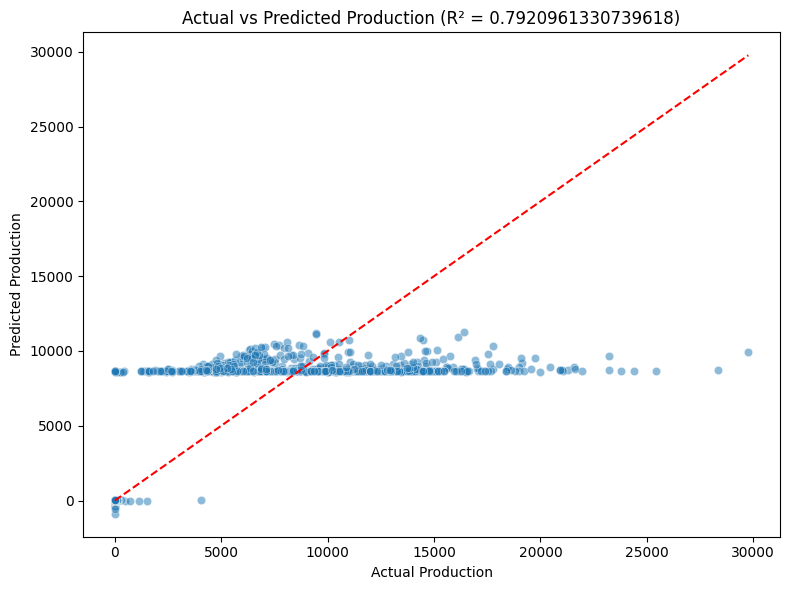

In [97]:


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred1, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title(f'Actual vs Predicted Production (R² = {r2_score(y_test, y_pred1)})')
plt.tight_layout()
plt.show()

### **4.2. Model 2: Ridge Regression with Hyperparameter Tuning**

In [98]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
ridge = Ridge()
param_dist = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 500, 1000],
    'solver': ['auto', 'saga', 'lsqr', 'sag'],
    'fit_intercept': [True, False]
}

#### **RandomSearchCV**

In [101]:
random_search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=Ridge(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1, 10, 50,
                                                  100, 200, 500, 1000],
                                        'fit_intercept': [True, False],
                                        'solver': ['auto', 'saga', 'lsqr',
                                                   'sag']},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [102]:
best_ridge = random_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)

In [103]:
print('the mean absolute error is : ' , mean_absolute_error(y_test , y_pred_ridge))
print('the r2 score is : ' , r2_score(y_test , y_pred_ridge))


the mean absolute error is :  37.91928292221479
the r2 score is :  0.7920969380032401


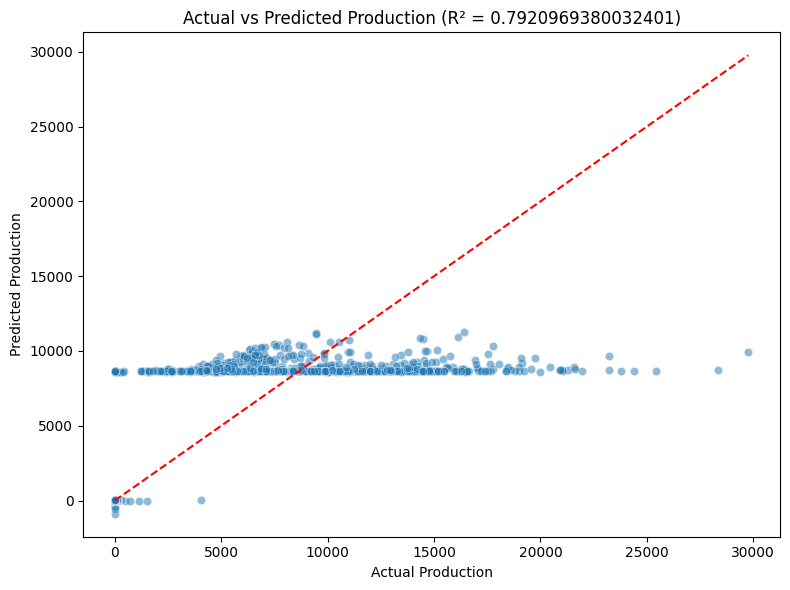

In [104]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title(f'Actual vs Predicted Production (R² = {r2_score(y_test, y_pred_ridge)})')
plt.tight_layout()
plt.show()

### **4.3. Model 3: Lasso Regression with Hyperparameter Tuning**

In [105]:
from sklearn.linear_model import Lasso

In [106]:
lasso = Lasso(max_iter=10000)

param_dist = {
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50],
    'fit_intercept': [True, False],
    'selection': ['cyclic', 'random']
}

In [107]:
random_search_lasso = RandomizedSearchCV(
    estimator=lasso,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search_lasso.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=Lasso(max_iter=10000), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.05,
                                                  0.1, 0.5, 1, 5, 10, 50],
                                        'fit_intercept': [True, False],
                                        'selection': ['cyclic', 'random']},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [108]:
best_lasso = random_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_scaled)


In [109]:
print('the mean absolute error is : ' , mean_absolute_error(y_test , y_pred_lasso))
print('the r2 score is : ' , r2_score(y_test , y_pred_lasso))


the mean absolute error is :  37.903717359072594
the r2 score is :  0.7920961699623585


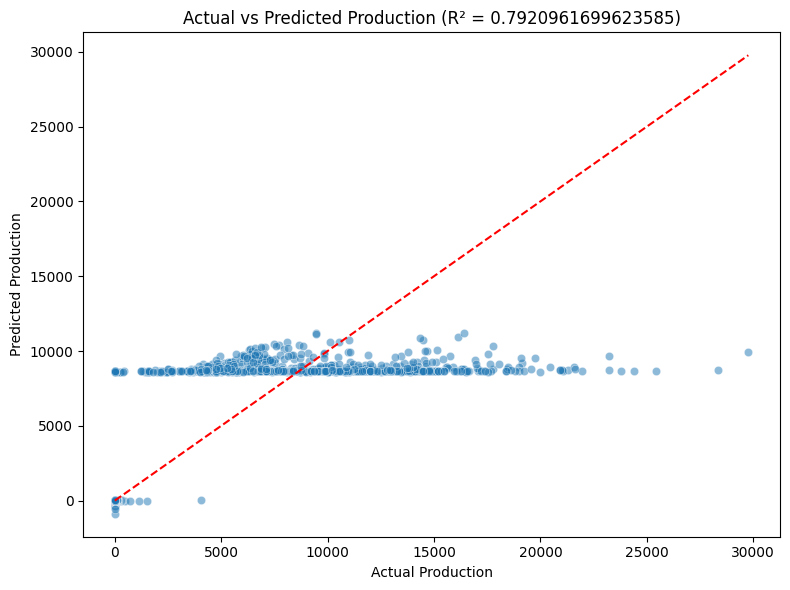

In [110]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title(f'Actual vs Predicted Production (R² = {r2_score(y_test, y_pred_lasso)})')
plt.tight_layout()
plt.show()

### **4.4. Model 4: XGBoost Regressor with Manual Tuning**

In [111]:
XGB1 = XGBRegressor(
    n_estimators = 100,
    n_jobs = -1,
    learning_rate = 0.05,
    early_stopping_rounds = 5,
)

XGB1.fit(
    X_train , y_train,
    eval_set = [(X_test , y_test)],
    verbose = False 
)

y_pred_XGB1 = XGB1.predict(X_test)
print('mae : ' , mean_absolute_error(y_test,y_pred_XGB1))
print('r2_score : ' , r2_score(y_test,y_pred_XGB1))

mae :  14.760481904981003
r2_score :  0.934915180999058


In [112]:
XGB2 = XGBRegressor(
    n_estimators = 200,
    n_jobs = -1,
    learning_rate = 0.07,
    early_stopping_rounds = 5
)

XGB2.fit(
    X_train , y_train,
    eval_set = [(X_test , y_test)],
    verbose = False 
)

y_pred_XGB2 = XGB2.predict(X_test)
print('mae : ' , mean_absolute_error(y_test,y_pred_XGB2))
print('r2_score : ' , (r2_score(y_test,y_pred_XGB2))*100 , '%')

mae :  14.053176212810637
r2_score :  93.93037924587662 %


In [113]:
XGB3 = XGBRegressor(
    n_estimators = 200,
    n_jobs = -1,
    learning_rate = 0.08,
    early_stopping_rounds = 5
)

XGB3.fit(
    X_train , y_train,
    eval_set = [(X_test , y_test)],
    verbose = 20
)

y_pred_XGB3 = XGB3.predict(X_test)
print('mae : ' , mean_absolute_error(y_test,y_pred_XGB3))
print('r2_score : ' , r2_score(y_test,y_pred_XGB3))

[0]	validation_0-rmse:834.68402
[20]	validation_0-rmse:303.32786
[40]	validation_0-rmse:242.82420
[60]	validation_0-rmse:226.83467
[80]	validation_0-rmse:224.42107
[83]	validation_0-rmse:224.47780
mae :  14.370888295983367
r2_score :  0.9377023024845901


In [114]:
XGB4 = XGBRegressor(
    n_estimators = 200,
    n_jobs = -1,
    learning_rate = 0.07,
    max_depth=6,
    subsample=0.8,            
    colsample_bytree=0.8,
    early_stopping_rounds = 20,
)

XGB4.fit(
    X_train , y_train,
    eval_set = [(X_test , y_test)],
    verbose = 20
)

y_pred_XGB4 = XGB4.predict(X_test)
print('mae : ' , mean_absolute_error(y_test,y_pred_XGB4))
print('r2_score : ' , r2_score(y_test,y_pred_XGB4))

[0]	validation_0-rmse:844.20169
[20]	validation_0-rmse:333.02844
[40]	validation_0-rmse:250.24774
[60]	validation_0-rmse:232.63705
[80]	validation_0-rmse:224.92936
[100]	validation_0-rmse:220.51355
[120]	validation_0-rmse:217.84925
[140]	validation_0-rmse:215.68917
[160]	validation_0-rmse:213.88098
[180]	validation_0-rmse:212.35269
[199]	validation_0-rmse:211.05586
mae :  13.624035609791576
r2_score :  0.9448811002659344


In [115]:
XGB5 = XGBRegressor(
    n_estimators = 500,
    n_jobs = -1,
    learning_rate = 0.08,
    max_depth=6,
    subsample=0.8,            
    colsample_bytree=0.8,
    early_stopping_rounds = 20,
)

XGB5.fit(
    X_train , y_train,
    eval_set = [(X_test , y_test)],
    verbose = 20
)

y_pred_XGB5 = XGB5.predict(X_test)
print('mae : ' , mean_absolute_error(y_test,y_pred_XGB5))
print('r2_score : ' , r2_score(y_test,y_pred_XGB5))

[0]	validation_0-rmse:836.55090
[20]	validation_0-rmse:311.88384
[40]	validation_0-rmse:245.12736
[60]	validation_0-rmse:229.08316
[80]	validation_0-rmse:222.40307
[100]	validation_0-rmse:219.78709
[120]	validation_0-rmse:218.37757
[140]	validation_0-rmse:216.02490
[160]	validation_0-rmse:214.50638
[180]	validation_0-rmse:213.10636
[200]	validation_0-rmse:211.96166
[220]	validation_0-rmse:211.39438
[238]	validation_0-rmse:211.36088
mae :  13.501654058456896
r2_score :  0.9447449337397437


In [116]:
XGB6 = XGBRegressor(
    n_estimators = 500,
    n_jobs = -1,
    learning_rate = 0.06,
    max_depth=6,
    subsample=0.8,            
    colsample_bytree=0.8,
    early_stopping_rounds = 20,
)

XGB6.fit(
    X_train , y_train,
    eval_set = [(X_test , y_test)],
    verbose = 20
)

y_pred_XGB6 = XGB6.predict(X_test)
print('mae : ' , mean_absolute_error(y_test,y_pred_XGB6))
print('r2_score : ' , r2_score(y_test,y_pred_XGB6))

[0]	validation_0-rmse:851.86533
[20]	validation_0-rmse:366.16785
[40]	validation_0-rmse:262.15369
[60]	validation_0-rmse:239.09314
[80]	validation_0-rmse:229.84090
[100]	validation_0-rmse:224.86486
[120]	validation_0-rmse:221.21689
[140]	validation_0-rmse:219.05913
[160]	validation_0-rmse:216.66726
[180]	validation_0-rmse:215.13035
[200]	validation_0-rmse:213.58403
[220]	validation_0-rmse:213.38085
[240]	validation_0-rmse:213.11101
[260]	validation_0-rmse:212.29786
[280]	validation_0-rmse:212.18991
[300]	validation_0-rmse:211.45433
[320]	validation_0-rmse:211.77461
[322]	validation_0-rmse:211.61343
mae :  13.404593723633512
r2_score :  0.9447305946527108


### **Best XGB Model with manual tunning**

In [117]:
XGB = XGBRegressor(
    n_estimators = 400,
    n_jobs = -1,
    learning_rate = 0.07,
    max_depth=6,
    subsample=0.8,            
    colsample_bytree=0.8,
    early_stopping_rounds = 20
    
)

XGB.fit(
    X_train , y_train,
    eval_set = [(X_test , y_test)],
    verbose = 10
)

y_pred_XGB = XGB.predict(X_test)
print('mae : ' , mean_absolute_error(y_test,y_pred_XGB))
print('r2_score : ' , r2_score(y_test,y_pred_XGB))

[0]	validation_0-rmse:844.20169
[10]	validation_0-rmse:483.39364
[20]	validation_0-rmse:333.02844
[30]	validation_0-rmse:272.96674
[40]	validation_0-rmse:250.24774
[50]	validation_0-rmse:239.61177
[60]	validation_0-rmse:232.63705
[70]	validation_0-rmse:227.60028
[80]	validation_0-rmse:224.92936
[90]	validation_0-rmse:222.78441
[100]	validation_0-rmse:220.51355
[110]	validation_0-rmse:219.22912
[120]	validation_0-rmse:217.84925
[130]	validation_0-rmse:216.96199
[140]	validation_0-rmse:215.68917
[150]	validation_0-rmse:214.69098
[160]	validation_0-rmse:213.88098
[170]	validation_0-rmse:212.84138
[180]	validation_0-rmse:212.35269
[190]	validation_0-rmse:211.22164
[200]	validation_0-rmse:211.04264
[210]	validation_0-rmse:210.68034
[220]	validation_0-rmse:210.22574
[230]	validation_0-rmse:210.18105
[240]	validation_0-rmse:210.30688
[243]	validation_0-rmse:210.06397
mae :  13.478202194560332
r2_score :  0.94531941028684


Highest R2_score, therefore the best model to be used as it will give us the best accuracy 

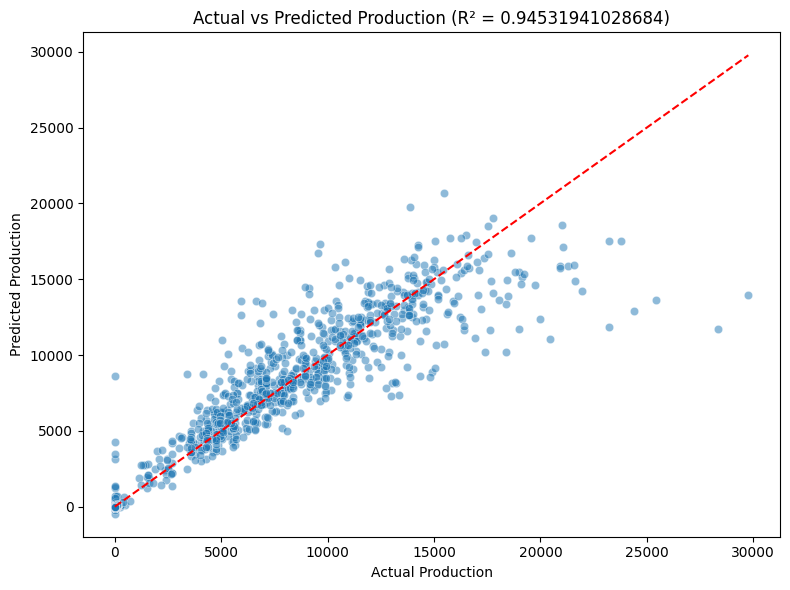

In [118]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_XGB, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title(f'Actual vs Predicted Production (R² = {r2_score(y_test, y_pred_XGB)})')
plt.tight_layout()
plt.show()

### **4.5. Model 5: XGBoost Regressor with hyperparameterise tunning**

In [119]:
param_grid = {
    'n_estimators' : [100,200,300,400,500],
    'max_depth' : [3,6,10],
    'learning_rate' : [0.05,0.07,0.08,0.1,0.2],
    'subsample' : [0.7,0.8,0.9,1],
    'colsample_bytree': [0.7, 0.9, 1],
    'reg_alpha': [0, 0.1, 1],     # L1 regularization
    'reg_lambda': [1, 1.5, 2] 
    
}

In [120]:
xgb = XGBRegressor(random_state =1 , n_jobs = -1)
random_search_xgb = RandomizedSearchCV(
    estimator = xgb,
    param_distributions = param_grid,
    n_iter = 30,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [121]:
random_search_xgb.fit(X_train, y_train)

best_model = random_search_xgb.best_estimator_

y_pred_best = best_model.predict(X_test)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [122]:
print('mae : ' , mean_absolute_error(y_test,y_pred_best))
print('r2_score : ' , r2_score(y_test,y_pred_best))

mae :  12.455554658903967
r2_score :  0.9450953837369374


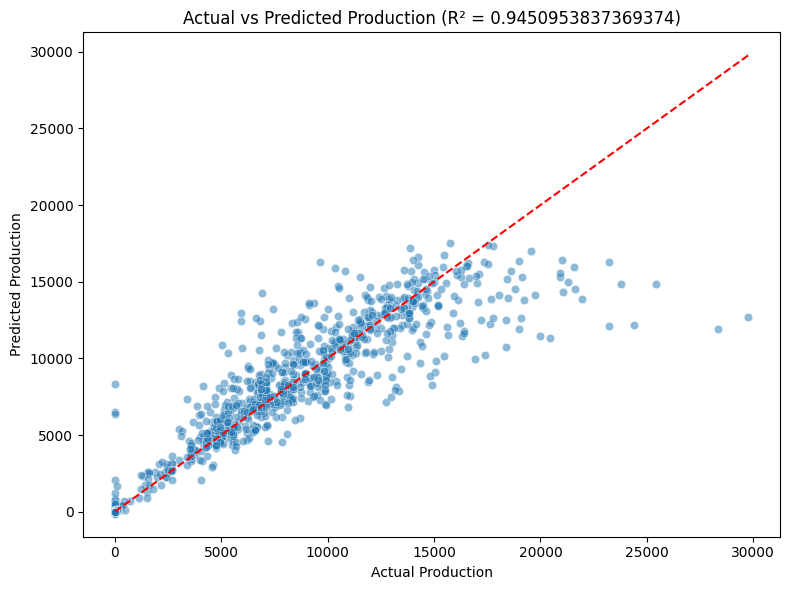

In [123]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title(f'Actual vs Predicted Production (R² = {r2_score(y_test, y_pred_best)})')
plt.tight_layout()
plt.show()

## **5. Model Comparison**

In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

In [125]:
def eval_model(name , y_test ,y_pred):
    r2 = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test , y_pred)
    mse = mean_squared_error(y_test , y_pred)
    rmse = mean_squared_error(y_test , y_pred , squared = False)
    
    print(f"\n{name} Results:")
    print(f"R² Score       : {r2:.4f} ({r2*100:.2f}%)")
    print(f"RMSE           : {rmse:.4f}")
    print(f"MSE            : {mse:.4f}")
    print(f"MAE            : {mae:.4f}")
    return {"Model": name, "RMSE": rmse, "MAE": mae, 'MSE' : mse ,"R²": r2}


In [126]:
results = []
results.append(eval_model("Linear Regression", y_test , y_pred1))
results.append(eval_model("XGBoost", y_test , y_pred_best))
results.append(eval_model('Ridge Regression' , y_test , y_pred_ridge))
results.append(eval_model('Lasso Regression' , y_test , y_pred_lasso))


Linear Regression Results:
R² Score       : 0.7921 (79.21%)
RMSE           : 409.4983
MSE            : 167688.8739
MAE            : 37.9196

XGBoost Results:
R² Score       : 0.9451 (94.51%)
RMSE           : 210.4385
MSE            : 44284.3772
MAE            : 12.4556

Ridge Regression Results:
R² Score       : 0.7921 (79.21%)
RMSE           : 409.4975
MSE            : 167688.2246
MAE            : 37.9193

Lasso Regression Results:
R² Score       : 0.7921 (79.21%)
RMSE           : 409.4983
MSE            : 167688.8441
MAE            : 37.9037


#### Comparing the 4 models, we can see that XGBRegressor had a higher accuracy as compared to LinearRegression as it gave us better predictions and LinearRegression , Lasso and Ridge gave us the identical results

### **5.1 Model Comparison Table**

In [127]:
results_df = pd.DataFrame(results)
(results_df)

,Model,RMSE,MAE,MSE,R²
0,Linear Regression,409.498320,37.919609,167688.873855,0.792096
1,XGBoost,210.438536,12.455555,44284.377230,0.945095
2,Ridge Regression,409.497527,37.919283,167688.224624,0.792097
3,Lasso Regression,409.498283,37.903717,167688.844102,0.792096


### **5.2 Model Comparison Plot**

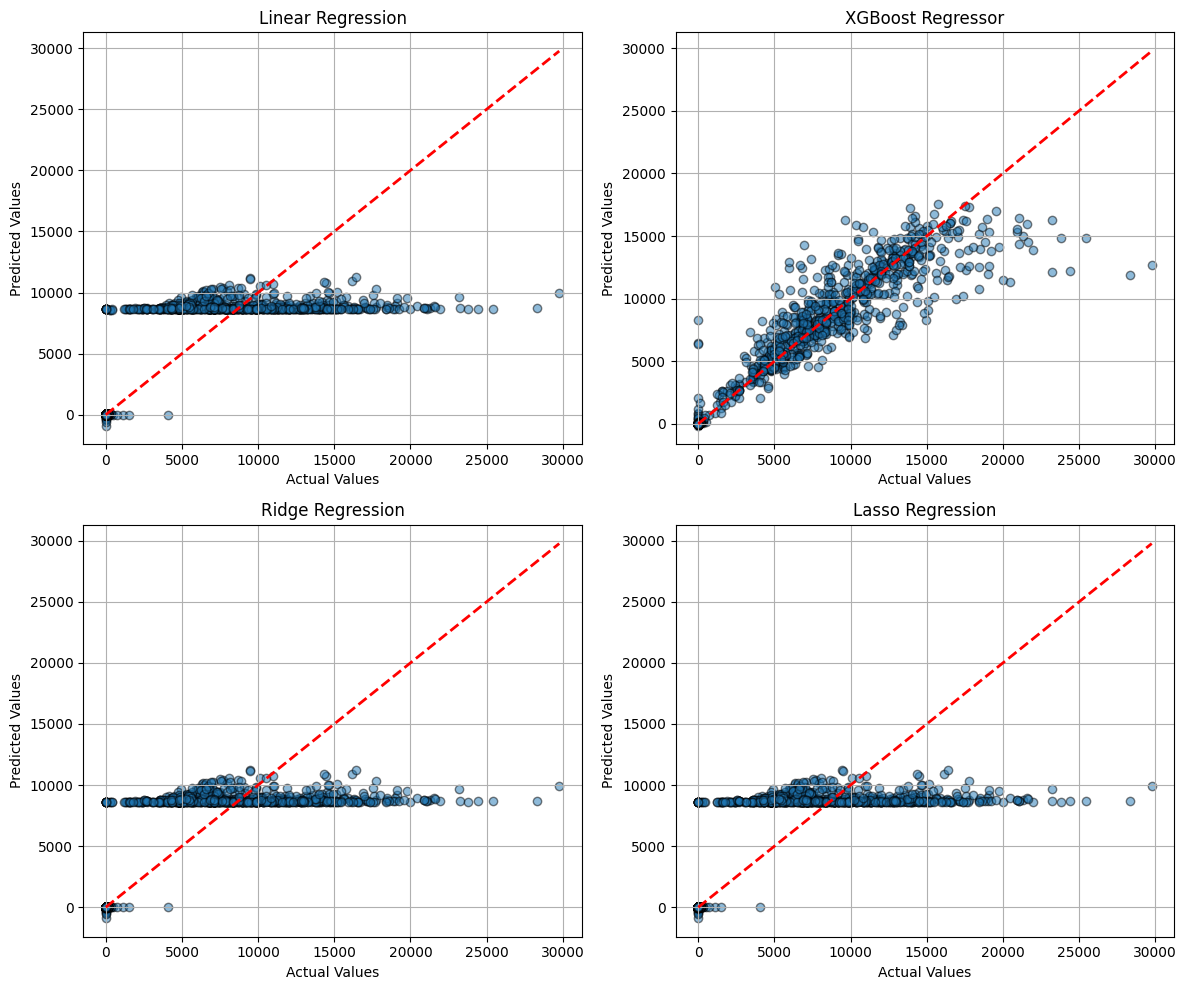

In [128]:
import matplotlib.pyplot as plt

def plot_actual_vs_pred(ax, y_true, y_pred, title):
    ax.scatter(y_true, y_pred, alpha=0.5, edgecolors='k')
    ax.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            'r--', lw=2)  # Perfect prediction line
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(title)
    ax.grid(True)

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting all 4 models
plot_actual_vs_pred(axs[0, 0], y_test, y_pred1, "Linear Regression")
plot_actual_vs_pred(axs[0, 1], y_test, y_pred_best, "XGBoost Regressor")
plot_actual_vs_pred(axs[1, 0], y_test, y_pred_ridge, "Ridge Regression")
plot_actual_vs_pred(axs[1, 1], y_test, y_pred_lasso, "Lasso Regression")

plt.tight_layout()
plt.show()



### **5.3 Actual vs Predicted**

##### Displayed below is the comparison of the actual yield vs the predicted yield by the XGBRegressor Model and the LinearRegression Model

#### **5.3.1 Prediction Table for All Models**

In [130]:
pred_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted_XGB_RSCV": y_pred_best,
    "Predicted_XGB_Manual": y_pred_XGB,
    "Predicted_LR" : y_pred1,
    "Predicted_Ridge" : y_pred_ridge,
    "Predicted_Lasso" : y_pred_lasso
})
pred_df.head(10)

,Actual,Predicted_XGB_RSCV,Predicted_XGB_Manual,Predicted_LR,Predicted_Ridge,Predicted_Lasso
293139,37.678571,36.660248,27.991890,26.990614,27.015763,26.967693
204373,0.926829,1.423107,0.834210,-0.788257,-0.801347,-0.736066
115726,1.000000,1.432211,0.877090,-3.540311,-3.557280,-3.515559
224966,0.306975,1.297954,0.802063,9.086890,9.065088,9.085826
38745,2.500000,2.646972,1.459629,11.817884,11.856083,11.844743
20660,0.225222,0.811932,0.013863,-4.385043,-4.398100,-4.332069
38678,1.431373,1.690574,1.394921,-3.703028,-3.716969,-3.646006
236453,2.488889,2.838873,1.811202,3.373569,3.361225,3.376190
37636,1.442017,2.139667,1.598592,-9.903364,-9.952927,-9.868173
149643,2.223494,2.893759,1.982802,6.304500,6.250340,6.266288


##### Looking at the table we can observe that the predictions made by LinearRegression model, Ridge and Lasso were far off from the actual values, while in case of the XGBRegressor (both tunned manually and by RandomizedSearchCV), the predicted values are more closer to the actual values.

#### **5.3.2 Feature Importances**

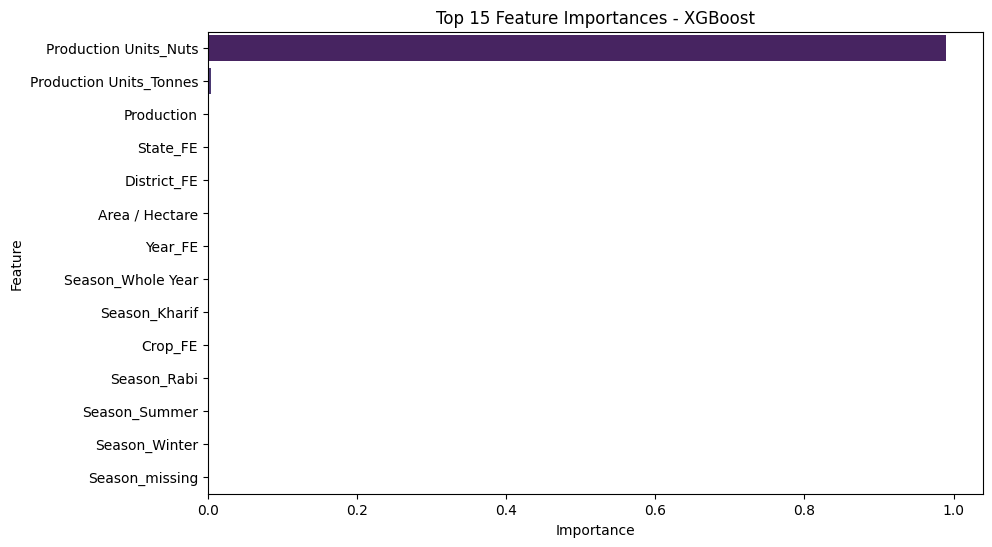

In [131]:

importances = best_model.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')
plt.title("Top 15 Feature Importances - XGBoost")
plt.show()

## **6. Conclusion**


### 🔍 Best Performing Model:
- **XGBoost Regressor** achieved the highest performance with:
  - **R² Score:** ~0.945
  - **RMSE:** Lowest among all models

### 📌 Key Insights:
- Regularization (Lasso/Ridge) did not significantly improve results compared to Linear Regression.
- Top 5 crops by production: **Coconut**, **Sugarcane**, **Rice**, **Wheat**, **Potato**.
- Highest production seen in states: **Kerela**, **Tamil Nadu**, **Karnataka**, **Andhara Pradesh**, **West Bemgal**.
-  Seasonal trend shows crops cultivated whole year leads in overall production while Kharif and Rabi come after it.

### 🌍 Real-World Applications:
- Assisting **farmers and policymakers** in making informed decisions on crop planning.
- Optimizing **resource allocation** based on expected production.


### 🚀 Future Work:
- Incorporate **weather and soil data** for better accuracy.
- Deploy the model using **Flask, FastAPI, or Streamlit** for real-time prediction.
- Build a **dashboard for visualization and decision support**.
